<a href="https://colab.research.google.com/github/AsmaaAlghamd1/Asmaa_INFO5731_-Spring2021/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [3]:
#importing necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords

from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('wordnet')
from sklearn.cluster import KMeans
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
import gensim
import scipy
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
#load the data
df=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")


In [5]:
print(df.shape)



(413840, 6)


In [6]:
df.head(100)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0.0
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0.0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1.0
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


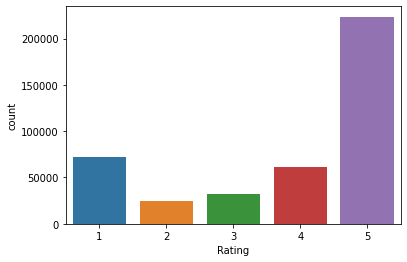

In [7]:
import seaborn as sns
sns.countplot(df.Rating)

In [8]:

import nltk
nltk.download('stopwords')
df['CleanedReviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['CleanedReviews'] = df['CleanedReviews'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
df['CleanedReviews'] = df['CleanedReviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['CleanedReviews'] = df['CleanedReviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedReviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone u used hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,work good go slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone replace lost phone thing volume bu...
...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,another great deal great price
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,ok
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,pass every drop test onto porcelain tile
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,returned meet need seemed good selection others


In [9]:
Vectorizer = TfidfVectorizer()
tfidf_vect = Vectorizer.fit_transform(df['CleanedReviews'].values)
Fnames= Vectorizer.get_feature_names()

In [39]:
def Posit(x):
    if x == 3:
        return 'negative'
    return 'positive'

ActualScore = df['Reviews']
Pos_Neg = actualScore.map(Posit) 
df['Rating'] = Pos_Neg
df.head(100)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedReviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone u used hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good go slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replace lost phone thing volume bu...
...,...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,positive,very well,0.0,well
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,positive,Cannot connect to GSM network,0.0,cannot connect gsm network
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,positive,"This cell phone exceeded my expectations, it's...",1.0,cell phone exceeded expectation user friendly ...
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,positive,"pros.. it works fine, its easy to use, not too...",1.0,pro work fine easy use heavycons apps android ...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


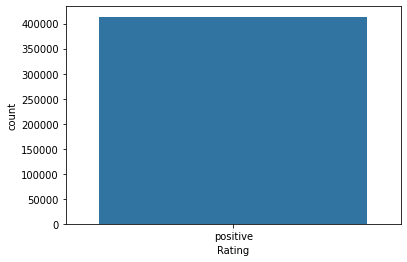

In [11]:
df['Rating'].value_counts()


sns.countplot(df.Rating)

In [10]:
%matplotlib inline

In [12]:
tfidf_vect = Vectorizer.fit_transform(df['CleanedReviews'].values)
tfidf_vect.shape


(413840, 125121)

In [ ]:
from collections import Counter
Km = KMeans()
kmodel = KMeans(n_clusters = 5, n_jobs = -1,random_state=99)
kmodel.fit(tfidf_vect) 
Counter(kmodel.labels_)

In [ ]:
from collections import Counter
labels = kmodel.labels_
cluster_center=kmodel.cluster_centers_


In [ ]:
Dta1 = tfidf_vect.get_feature_names() 
Dta1[1:10]
Df1 = df1
Df1['Tfidf Clus Label'] = Kmodel.labels_
Df1.head(10)

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_vectors,Kmodel.labels_, metric='euclidean')
silhouette_score

# DBSCAN

In [20]:

import gensim
AMreview=[]
for i in df['CleanedReviews']:
  AMreview.append(i.split())

W2Vmodel=gensim.models.Word2Vec(AMreview, size=100, workers=4)

In [21]:
import numpy as np
AMvectors = []
for i in AMreview:
    vector = np.zeros(100)
    count = 0
    for x in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    AMvectors.append(vector)  
AMvectors = np.array(AMvectors)
AMvectors = np.nan_to_num(AMvectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [31]:
from sklearn.cluster import DBSCAN
def LNum(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def Neighbour(x, data): 
    lists = []
    for val in data:
        list1 = np.sum((x -val) **2 ) 
        if(len(lists) == 200 and lists[199] > list1): 
            l = int(LNum(lists, list1)) 
            if l < 200 and l >= 0 and lists[l] > list1:
                lists[l] = list1
        else:
            lists.append(list1)
            lists.sort()
    
    return lists[199]

In [27]:

AMvectors.shape

(413840, 100)

In [32]:
list2 = []
for val in AMvectors[:1000]:
    list2.append(compute200thnearestneighbour(val, AMvectors[:300]))
list2.sort()

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

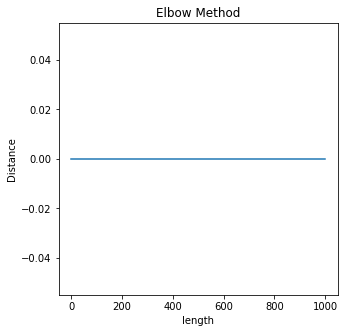

In [36]:
# Plotting Elbow Method :
plt.figure(figsize=(5,5))
plt.title("Elbow Method")
plt.plot([x for x in range(len(list2))],list2)
plt.xlabel("The length")
plt.ylabel(" The Distance")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
list3 = 2 * 100
model = DBSCAN(eps = 8, min_samples = list3, n_jobs=-2)
model.fit(AMvectors)
df['AVG-W2V Clus Label'] = model.labels_
df.head(10)

In [ ]:

import scipy
from scipy.cluster import hierarchy
Dendro=hierarchy.dendrogram(hierarchy.linkage(AMvectors,method='ward'))
plt.axhline(y=20)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Mycluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
Agg=Mycluster.fit_predict(AMvectors)

# Hierarchial clustering

In [67]:

from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

def ward_hierarchical_clustering(feature_matrix):
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [ ]:
linkage_matrix = ward_hierarchical_clustering(tfidf_vect)
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           data=df,
                           figure_size=(10, 12))